### first, download the dataset either manually or through the API provided by Kaggle(optional)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np     
import seaborn as sns  

In [2]:
total_data = pd.read_csv('./data/nyc_taxi_data_2014.csv' , low_memory=False ) 

In [3]:
nyc_data = total_data.sample(frac=0.02)# due to lack of computational resource is just pick limited rows (14m rows total)

In [4]:
nyc_data.isna().sum()

vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
rate_code                  0
store_and_fwd_flag    152572
dropoff_longitude          2
dropoff_latitude           2
payment_type               0
fare_amount                0
surcharge                  0
mta_tax                    0
tip_amount                 0
tolls_amount               0
total_amount               0
dtype: int64

### handling missing values and removing unnecessary features and also modifing some features type 

In [5]:
nyc_df = nyc_data.drop(columns=['vendor_id', 'store_and_fwd_flag' , 'payment_type'])
nyc_df.dropna(inplace=True) # because very small percentage of data is nan we dropoff them
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

### in here , we extract the target and trip duration from pick and drop off data time 

In [6]:
trip_duration = nyc_df['dropoff_datetime'] - nyc_df['pickup_datetime']
nyc_df['target_time'] = pd.to_timedelta(trip_duration).dt.total_seconds()
nyc_df

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,target_time
1785170,2014-01-20 13:11:00,2014-01-20 13:16:00,2,1.18,-74.002728,40.760165,1,-73.991350,40.770370,6.0,0.0,0.5,1.00,0.0,7.50,300.0
14034448,2014-02-09 02:03:49,2014-02-09 02:19:05,1,4.90,-73.992284,40.764213,1,-73.935900,40.796201,16.0,0.5,0.5,0.00,0.0,17.00,916.0
8358667,2014-01-09 01:39:00,2014-01-09 01:41:00,3,0.50,-73.986310,40.755402,1,-73.979540,40.752730,4.0,0.5,0.5,1.12,0.0,6.12,120.0
305981,2014-01-12 02:02:34,2014-01-12 02:14:06,1,5.70,-73.986988,40.764292,1,-73.955856,40.822537,18.0,0.5,0.5,3.80,0.0,22.80,692.0
73177,2014-01-10 12:36:26,2014-01-10 12:46:22,1,0.70,-73.984683,40.748234,1,-73.976365,40.748224,7.5,0.0,0.5,1.60,0.0,9.60,596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12223602,2014-01-18 16:09:06,2014-01-18 16:15:17,2,1.20,-73.966785,40.794072,1,-73.956782,40.783288,6.5,0.0,0.5,0.00,0.0,7.00,371.0
13332823,2014-01-22 17:03:47,2014-01-22 17:09:45,2,1.00,-73.973672,40.792200,1,-73.981897,40.778543,6.5,1.0,0.5,0.00,0.0,8.00,358.0
13397756,2014-01-23 16:38:03,2014-01-23 16:47:07,1,0.70,-73.970325,40.756078,1,-73.963403,40.765862,7.0,1.0,0.5,0.00,0.0,8.50,544.0
14774011,2014-02-09 21:05:00,2014-02-09 21:11:00,1,2.63,-73.973557,40.743670,1,-73.987122,40.720752,9.5,0.5,0.5,0.00,0.0,10.50,360.0


We analyzed the correlation between features and the target variable (`target_time`), we also try to detect extreme outliers with the help of logarithmic distribution 

Key findings:
- **`total_amount`**, **`fare amount`**, and **`tip amount`** and **`trip_distance`** show a **positive correlation** with `target_time`.
- A long right tail in the distribution shows we have extreme outliers.


c:\Users\Alchemist\Desktop\NewYork_Taxi_Travel_Prediction-main\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


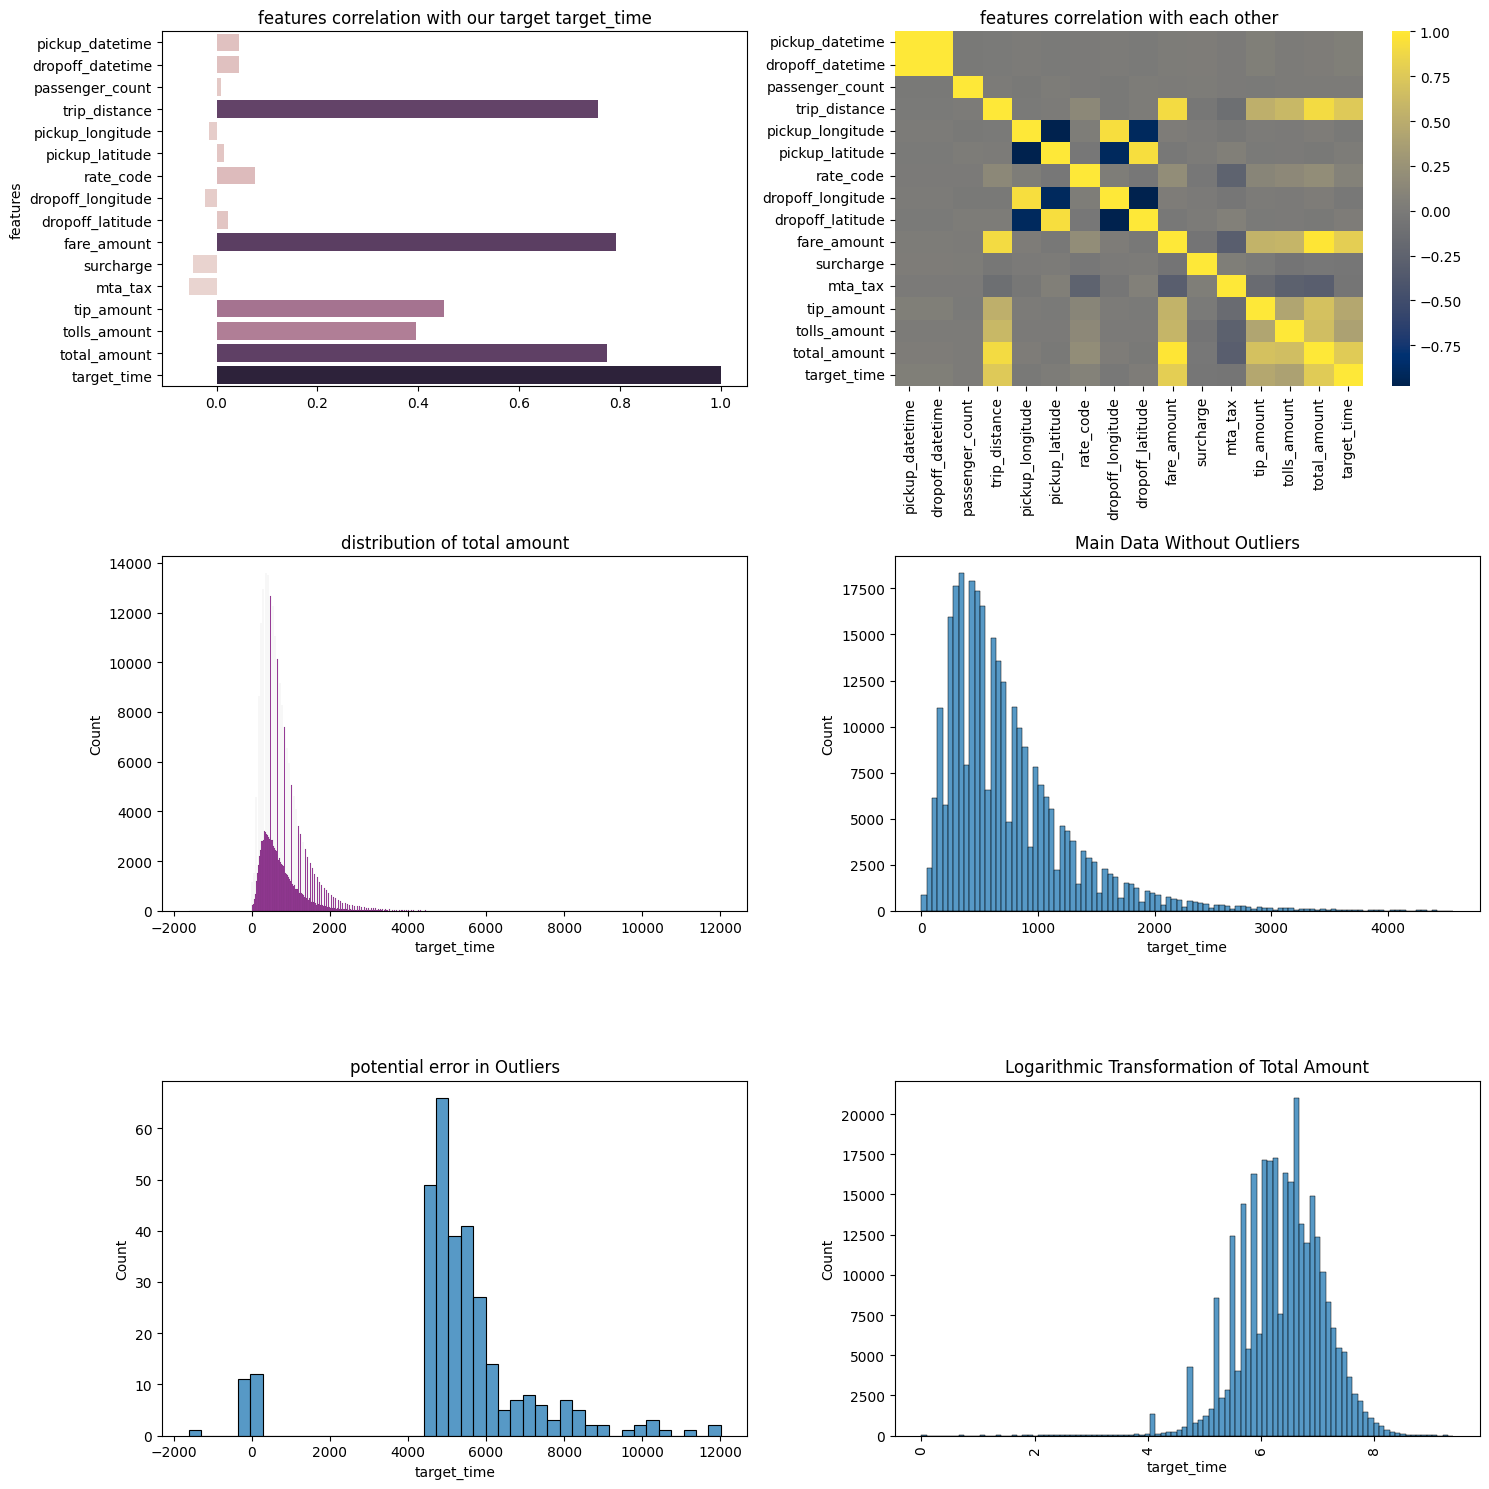

In [7]:
correlation = nyc_df.corr()['target_time']
fig , axes = plt.subplots(3, 2 , figsize=(15,15))
sns.barplot(y= correlation.index , x=correlation.values ,hue=correlation.values , legend=False , ax=axes[0 , 0])
axes[0 , 0].set_title('features correlation with our target target_time')

axes[0 ,0].set_ylabel('features')

plt.xticks(rotation=90);

# lets see  the distribution of 'target_time' 

sns.heatmap(nyc_df.corr() , ax =axes[0 ,1], cmap='cividis')
axes[0 , 1].set_title('features correlation with each other')


sns.histplot(x=nyc_df['target_time'] , ax=axes[1, 0] , color='purple')
axes[1, 0].set_title('distribution of total amount')

# Set thresholds for identifying outliers , i decided to consider very low and hight treshhold for this
upper_outliers_threshold = nyc_df['target_time'].quantile(0.999)
lower_outliers_threshold = nyc_df['target_time'].quantile(0.001)

# Ploting 'target_time' without outliers, to focuse on the main data distribution

sns.histplot(x=nyc_df[(nyc_df['target_time']< upper_outliers_threshold) & (nyc_df['target_time']> lower_outliers_threshold)]['target_time'] , ax=axes[1, 1] , bins=100)
axes[1, 1].set_title('Main Data Without Outliers')

# i used logarithmic transformation to 'target_time' to reduce the impact of outliers and see the distribution more clearly

outliers = nyc_df[(nyc_df['target_time'] > upper_outliers_threshold) | (nyc_df['target_time'] < lower_outliers_threshold)] 

sns.histplot(outliers['target_time'] , ax=axes[2, 0])
axes[2, 0].set_title(f'potential error in Outliers')

sns.histplot(x=np.log(nyc_df['target_time'].replace(0, np.nan).dropna())  , ax=axes[2, 1] , bins=100 ) ## since some values are zero , they are invalid and raise error for np.log i removed them 
axes[2, 1].set_title('Logarithmic Transformation of Total Amount')

plt.tight_layout()



### Date and Time Feature Extraction  
Extracted relevant features (day, weekday, month, hour, minute) from `pickup_datetime` and `dropoff_datetime` for analysis and modeling, focusing only on useful time components since all data is from 2014 and trips are shorter than a day.  


In [8]:
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

#since data is only in 2014 so year doesn't matter 
nyc_df['pickup_weekday']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['pickup_hour']=nyc_df['pickup_datetime'].dt.hour


In [9]:
# nyc_df = nyc_df.drop(columns=['pickup_datetime', 'dropoff_datetime'])
nyc_df['pickup_is_weekend'] = nyc_df['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0) 
# since weekend matter and its special ocasion i tried to create feature here , for weekend where 
# weekday is higher that 5 , saturday and sunday

#### Since traffic density is higher during rush hours, separating these times can help the model identify patterns more effectively. The `is_rush_hour` or `is_holidy`feature may become an important factor in predicting outcomes like trip duration or fare.


In [10]:
nyc_df['is_rush_hour'] = nyc_df['pickup_hour'].isin([7, 8, 9  , 17, 18, 19]).astype(int)
nyc_df['is_holiday'] = nyc_df['pickup_month'].isin([12, 1]).astype(int)


In [11]:
#just wanted to move target column to last column
col_to_move =nyc_df.pop('target_time') 
nyc_df['target_time'] = col_to_move

nyc_df.sample(frac=0.1)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,...,tip_amount,tolls_amount,total_amount,pickup_weekday,pickup_month,pickup_hour,pickup_is_weekend,is_rush_hour,is_holiday,target_time
8403962,2014-01-09 08:57:00,2014-01-09 09:05:00,1,1.41,-73.979045,40.749965,1,-74.000462,40.754207,7.5,...,0.0,0.00,8.00,3,1,8,0,1,1,480.0
4471765,2014-01-02 09:09:00,2014-01-02 09:14:00,6,0.73,-73.964967,40.758007,1,-73.972085,40.749875,5.0,...,1.0,0.00,6.50,3,1,9,0,1,1,300.0
11902367,2014-01-18 23:54:15,2014-01-19 00:00:03,4,1.50,-73.971807,40.750381,1,-73.987030,40.732294,7.0,...,1.0,0.00,9.00,5,1,23,1,0,1,348.0
4025917,2014-01-31 10:47:00,2014-01-31 11:04:00,1,3.48,-73.989157,40.768295,1,-74.000155,40.737955,14.5,...,0.0,0.00,15.00,4,1,10,0,0,1,1020.0
1192310,2014-01-13 14:01:12,2014-01-13 14:15:23,2,2.00,-73.959943,40.769157,1,-73.984158,40.757720,10.5,...,1.5,0.00,12.50,0,1,14,0,0,1,851.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460499,2014-01-04 23:49:24,2014-01-05 00:00:49,1,2.10,-73.991292,40.750091,1,-73.967161,40.756854,10.0,...,5.0,0.00,16.00,5,1,23,1,0,1,685.0
9537826,2014-01-12 15:38:00,2014-01-12 16:08:00,5,12.78,-73.987122,40.759387,1,-73.862027,40.768535,38.0,...,13.0,5.33,56.83,6,1,15,1,0,1,1800.0
4769612,2014-01-03 21:52:00,2014-01-03 21:59:00,6,1.05,-73.991195,40.755732,1,-73.995950,40.745595,6.5,...,0.0,0.00,7.50,4,1,21,0,0,1,420.0
1012084,2014-01-11 16:54:36,2014-01-11 16:58:23,1,1.40,-73.991192,40.760630,1,-73.999742,40.743462,6.0,...,0.0,0.00,6.50,5,1,16,1,0,1,227.0


### we don't need haversin because we have trip distance and all of them is filled 

In [12]:
# from math import radians, cos, sin, sqrt, atan2

# def haversine(lon1, lat1, lon2, lat2):
#     R = 6371  # Earth radius in km
#     dlon = radians(lon2 - lon1)
#     dlat = radians(lat2 - lat1)
#     a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     return R * c

# nyc_df['haversine_distance'] = nyc_df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
#                                                           row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


### I created features like `is_rush_hour`, `is_holiday`, and `pickup_is_weekend` and performed analytical visualizations to explore how these features interact with the target variable.

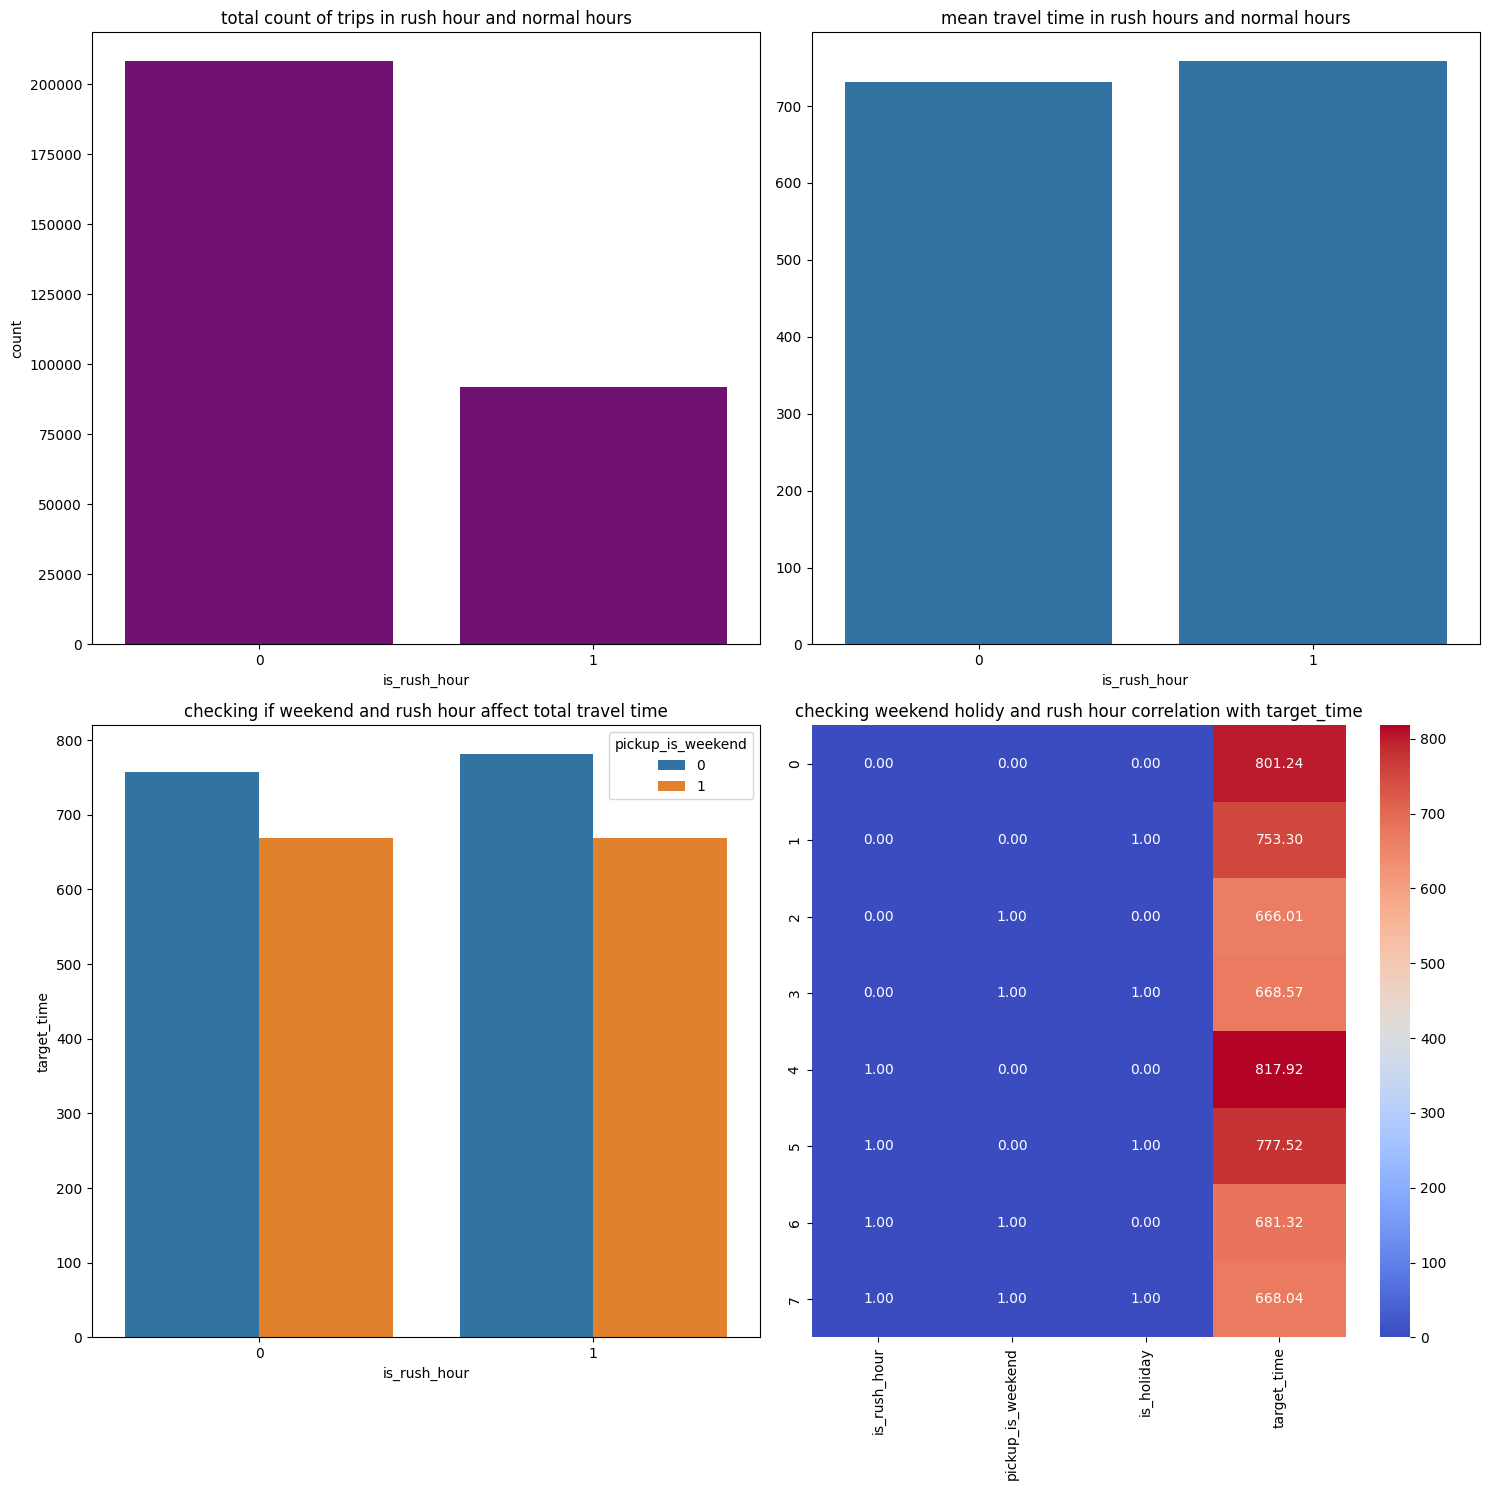

In [13]:
fig , axes = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(x=nyc_df['is_rush_hour'], color='purple' , ax=axes[0, 0])
axes[0, 0].set_title('total count of trips in rush hour and normal hours')


mean_amount  = nyc_df.groupby('is_rush_hour')['target_time'].mean()

sns.barplot(x=mean_amount.index , y= mean_amount.values , ax=axes[0 ,1])
axes[0, 1].set_title('mean travel time in rush hours and normal hours')

mean_amount_weekend= nyc_df.groupby(['is_rush_hour', 'pickup_is_weekend'])['target_time'].mean()
sns.barplot(data=mean_amount_weekend.reset_index(), x='is_rush_hour', y='target_time', hue='pickup_is_weekend', ax=axes[1, 0])

axes[1, 0].set_title('checking if weekend and rush hour affect total travel time')
mean_amount = nyc_df.groupby(['is_rush_hour', 'pickup_is_weekend', 'is_holiday'])['target_time'].mean()

sns.heatmap(mean_amount.reset_index(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True , ax=axes[1,1])
axes[1, 1].set_title('checking weekend holidy and rush hour correlation with target_time')

mean_amount.reset_index()
fig.tight_layout()


### whole data set correlation for feature selection

<Axes: >

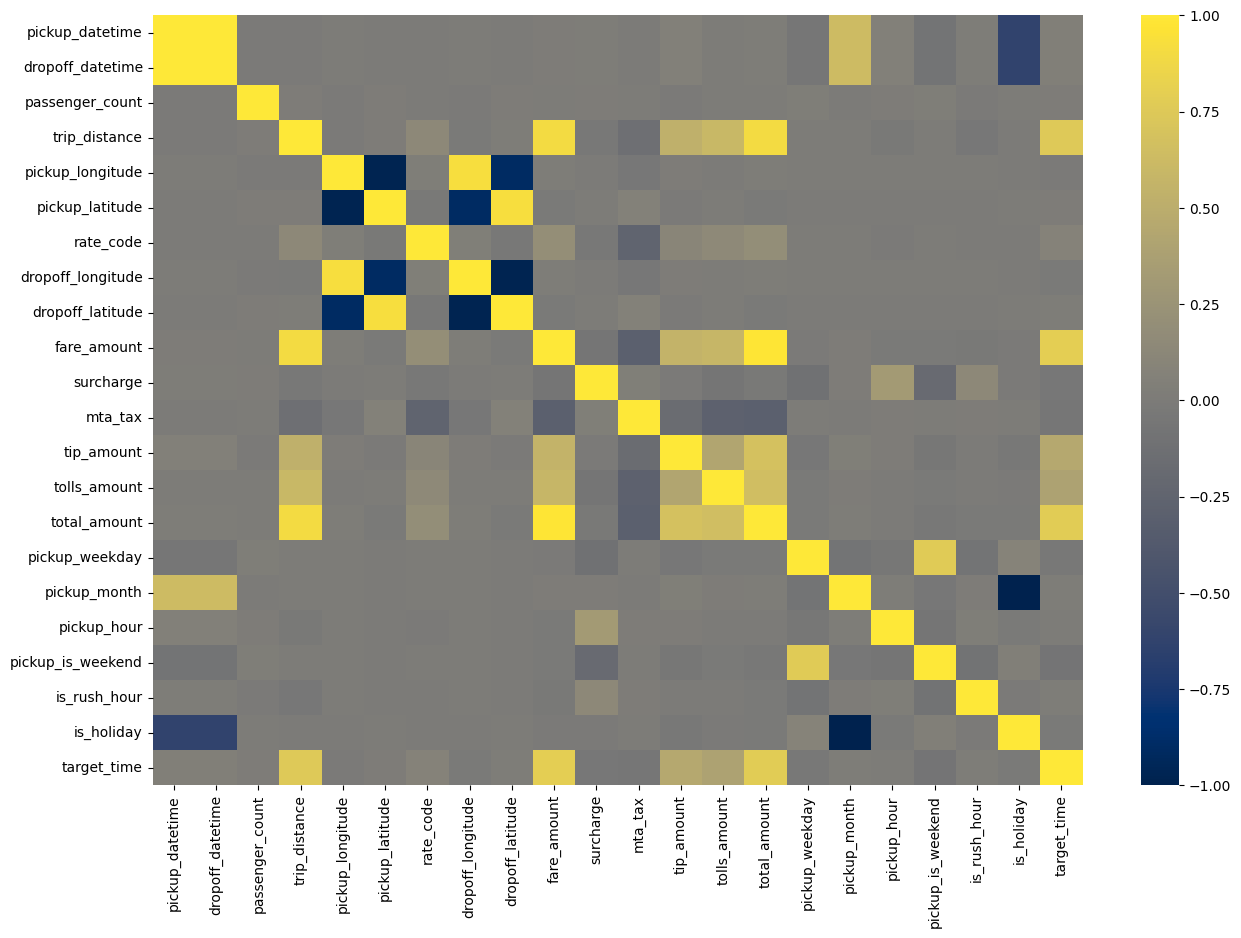

In [14]:
axes , fig = plt.subplots(figsize=(15 , 10))
sns.heatmap(nyc_df.corr() , cmap='cividis' )

it seems rush hour and weekend doesn't affect travel time that much , but total amound and tools amound and even tip amound and trip distance has more positive correlation with our target time 


In [15]:
nyc_df.drop(['passenger_count', 'pickup_longitude', 'pickup_latitude', 
             'dropoff_longitude', 'dropoff_latitude', 
              'pickup_weekday' , 'pickup_datetime' , 'dropoff_datetime'], axis=1, inplace=True)


In [16]:
nyc_df.sample(frac=.01)

,trip_distance,rate_code,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_month,pickup_hour,pickup_is_weekend,is_rush_hour,is_holiday,target_time
4867834,2.02,1,8.0,0.0,0.5,0.00,0.0,8.50,1,14,1,0,1,420.0
10819883,0.34,1,3.5,0.0,0.5,0.00,0.0,4.00,1,9,1,1,1,120.0
13882538,1.55,1,10.5,0.0,0.5,1.50,0.0,12.50,2,9,0,1,0,900.0
1395467,2.20,1,9.5,1.0,0.5,2.20,0.0,13.20,1,18,0,1,1,612.0
6496520,1.90,1,10.0,0.0,0.5,1.50,0.0,12.00,1,14,0,0,1,753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798662,4.95,1,17.5,0.5,0.5,1.80,0.0,20.30,1,2,1,0,1,1140.0
12808563,1.90,1,12.5,1.0,0.5,1.50,0.0,15.50,1,19,0,1,1,1107.0
7916148,1.58,1,8.5,0.0,0.5,2.12,0.0,11.12,1,8,0,1,1,660.0
5460846,3.30,1,14.5,0.5,0.5,1.50,0.0,17.00,1,0,1,0,1,1037.0


### here we already selected some features , but with feature selection , i want to pick top 5 features to test them to to see if i can get most accuracy

In [17]:

### let pick top 5 features automatically with help of sklearn

from sklearn.feature_selection import SelectKBest, f_classif 
train_df = nyc_df.drop('target_time', axis=1 )
target = nyc_df['target_time']
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit_transform(train_df , target)
selected_features_by_sklearn = train_df.columns[selector.get_support()]
# selector.get_support() returns boolean [true false true false ,...]
selected_features_by_sklearn

Index(['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
       'total_amount'],
      dtype='object')

In [21]:
train_df_selected_best = train_df[selected_features_by_sklearn] 
train_df_selected_best

## warning ..> we ignore this featuer selection because we have enough feature no need to deacrease them more 

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount
1785170,1.18,6.0,1.00,0.0,7.50
14034448,4.90,16.0,0.00,0.0,17.00
8358667,0.50,4.0,1.12,0.0,6.12
305981,5.70,18.0,3.80,0.0,22.80
73177,0.70,7.5,1.60,0.0,9.60
...,...,...,...,...,...
12223602,1.20,6.5,0.00,0.0,7.00
13332823,1.00,6.5,0.00,0.0,8.00
13397756,0.70,7.0,0.00,0.0,8.50
14774011,2.63,9.5,0.00,0.0,10.50


# Training our model

In [23]:
# since we are predicting the continues value we test out the regression model on our data set 

from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from skopt import BayesSearchCV 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV  , learning_curve
from scipy.stats import randint , uniform


x_train , x_test , y_train ,y_test = train_test_split(train_df, target, train_size=.8)

hyperparameters = {
    'xgboost': {
        'n_estimators': randint(50  ,80),
        'max_depth': randint(6, 15),
        'learning_rate': uniform(0.1, 0.3)
    },
    'RandomForest': {
        'n_estimators': randint(50, 80),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'max_depth': randint(30, 50),
        'max_features': [ 'sqrt', 'log2'],
    },

}


def train_dataset(model , hyperparameters , x_train, y_train):
    if hyperparameters : 
        random_search_result = RandomizedSearchCV(model , param_distributions=hyperparameters , n_iter=10, cv=2, scoring='r2', random_state=42 , n_jobs=-1)
        rsr_model = random_search_result.fit(x_train, y_train)
        return rsr_model.best_estimator_  
    else: 
        model.fit(x_train , y_train)
        return model
        


rsr_model = train_dataset(RandomForestRegressor(), hyperparameters['RandomForest'] , x_train, y_train)
xgb_model = train_dataset(XGBRegressor(), hyperparameters['xgboost'], x_train , y_train)
lin_model = train_dataset(LinearRegression(),  None, x_train, y_train)


print(f'best random forest model and paramters are => {rsr_model}' )
print(f'best xgboost model and paramters are => {xgb_model}' )
print(f'best linear regression model is => {lin_model}' )
    



best random forest model and paramters are => RandomForestRegressor(max_depth=46, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=5, n_estimators=72)
best xgboost model and paramters are => XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=np.float64(0.10617534828874074), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=73, n_jobs=None,
             num_parallel_tree=None, random_state=None, 

In [24]:
#! i wanted to add seaching mechanism to function too , but one cell took too much time to train so i rewrite the code
hyperparameters_bayes= {
    'xgboost':{
        'n_estimators': (100, 200),
        'max_depth': (6, 15),
        'learning_rate': (0.1, 0.3)
    },

    'RandomForest': {
        'n_estimators': (50, 100),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 10),
        'max_depth': (30, 100),
        'max_features': ['sqrt', 'log2'],
    }
}

def train_dataset_with_Bayes(model , hyperparameters , x_train, y_train):
    bayes_search_result = BayesSearchCV(model, hyperparameters, n_iter=10, cv=2 , n_jobs=-1, scoring = 'r2')
    bsr_model = bayes_search_result.fit(x_train, y_train)
    return bsr_model.best_estimator_

bayes_rsr_model = train_dataset_with_Bayes(rsr_model, hyperparameters_bayes['RandomForest'], x_train , y_train)
bayes_xgb_model = train_dataset_with_Bayes(xgb_model, hyperparameters_bayes['xgboost'], x_train , y_train)




### checking r2 score

In [25]:
from sklearn.metrics import r2_score

# Predictions on train and test sets
def extract_each_score (model , model_name ,  x_train , x_test , y_train , y_test): 
    y_train_pred = model.predict(x_train) 
    y_test_pred = model.predict(x_test)

    r2_train = r2_score(y_train, y_train_pred)  
    r2_test = r2_score(y_test, y_test_pred)    
    print( f"Training R2 Score for the model {model_name} is : {r2_train}" , f"Test R2 Score for {model_name} is : {r2_test}")
    return r2_train , r2_test

bayes_rf_train, bayes_rf_test = extract_each_score(bayes_rsr_model, 'BayesianRF', x_train, x_test, y_train, y_test)
bayes_xgb_train, bayes_xgb_test = extract_each_score(bayes_xgb_model, 'BayesianXGB', x_train, x_test, y_train, y_test)
rf_train, rf_test = extract_each_score(rsr_model, 'RandomForest', x_train, x_test, y_train, y_test)
xgb_train, xgb_test = extract_each_score(xgb_model, 'XGBoost', x_train, x_test, y_train, y_test)
lr_train, lr_test = extract_each_score(lin_model, 'LinearReg', x_train, x_test, y_train, y_test)



Training R2 Score for the model BayesianRF is : 0.934920250806953 Test R2 Score for BayesianRF is : 0.8958083681098283
Training R2 Score for the model BayesianXGB is : 0.9319752223944899 Test R2 Score for BayesianXGB is : 0.9023220804862027
Training R2 Score for the model RandomForest is : 0.9379530249054471 Test R2 Score for RandomForest is : 0.8956769338412053
Training R2 Score for the model XGBoost is : 0.9323819772025004 Test R2 Score for XGBoost is : 0.9028205188874123
Training R2 Score for the model LinearReg is : 0.6822591961495161 Test R2 Score for LinearReg is : 0.6638097238602589


### checking Errors 

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to extract error metrics (MSE and MAE) for test data
def extract_error_metrics_test(model, model_name, x_test, y_test):
    # Predictions on test set
    y_test_pred = model.predict(x_test)

    # Calculating MSE and MAE for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Printing the results
    print(f"Test MSE for the model {model_name} is : {mse_test}")
    print(f"Test MAE for the model {model_name} is : {mae_test}")

    return mse_test, mae_test

# Example usage for different models:
bayes_rf_mse_test, bayes_rf_mae_test = extract_error_metrics_test(bayes_rsr_model, 'BayesianRF', x_test, y_test)
bayes_xgb_mse_test, bayes_xgb_mae_test = extract_error_metrics_test(bayes_xgb_model, 'BayesianXGB', x_test, y_test)
rf_mse_test, rf_mae_test = extract_error_metrics_test(rsr_model, 'RandomForest', x_test, y_test)
xgb_mse_test, xgb_mae_test = extract_error_metrics_test(xgb_model, 'XGBoost', x_test, y_test)
lr_mse_test, lr_mae_test = extract_error_metrics_test(lin_model, 'LinearReg', x_test, y_test)


Test MSE for the model BayesianRF is : 32937.30766672235
Test MAE for the model BayesianRF is : 68.61486345067411
Test MSE for the model BayesianXGB is : 30878.17734405568
Test MAE for the model BayesianXGB is : 62.563330836570266
Test MSE for the model RandomForest is : 32978.85698181659
Test MAE for the model RandomForest is : 68.5416033080765
Test MSE for the model XGBoost is : 30720.609805514217
Test MAE for the model XGBoost is : 62.265098080085714
Test MSE for the model LinearReg is : 106277.27350932802
Test MAE for the model LinearReg is : 182.96957988293445


### I tried to visualize how by increasing data , the perfomacne in train data and test data changes to detect if there is overfitting happening or not 

Text(0.02, 0.5, 'Score')

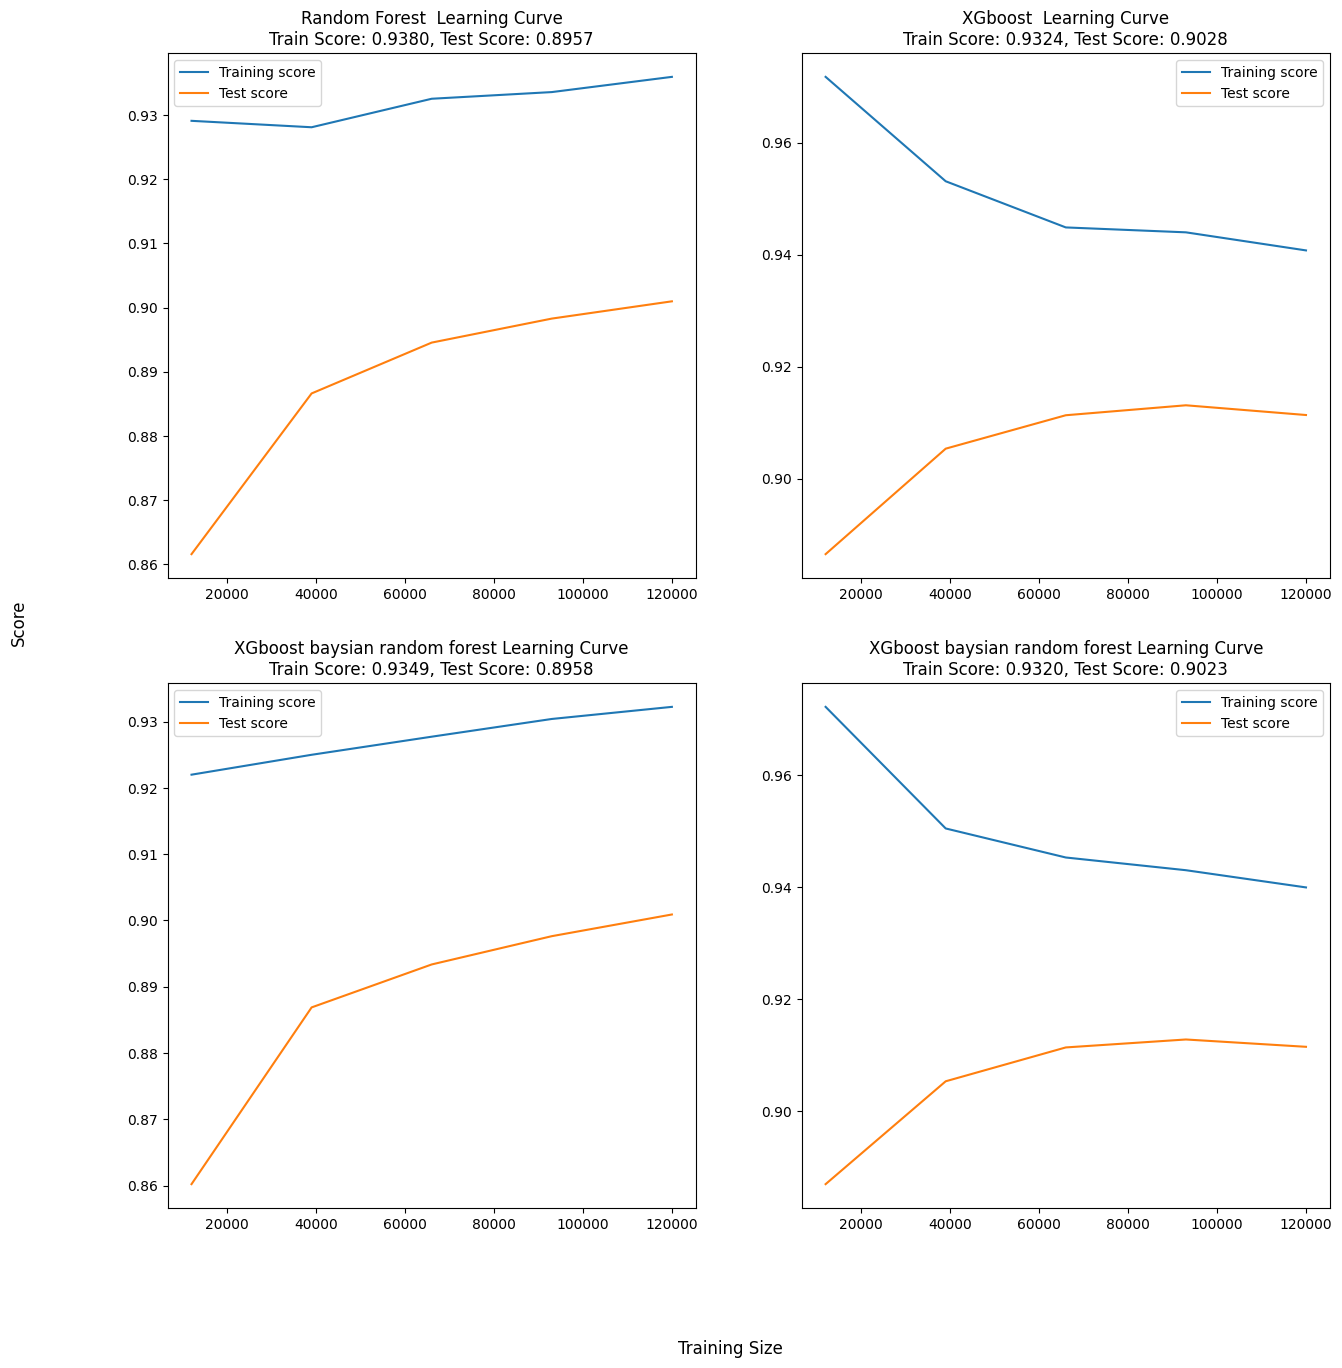

In [ ]:
fig , axes = plt.subplots(2,2, figsize=(15, 15))


def learning_curve_handler(model , x_train , y_train , axes): 
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=2)
    sns.lineplot(x=train_sizes, y=train_scores.mean(axis=1), ax=axes, label="Training score") 
    sns.lineplot(x=train_sizes, y=test_scores.mean(axis=1), ax=axes, label="Test score")

learning_curve_handler(rsr_model, x_train , y_train , axes[0, 0])

axes[0, 0].set_title(
    f"Random Forest  Learning Curve\nTrain Score: {rf_train:.4f}, Test Score: {rf_test:.4f}")

learning_curve_handler(xgb_model, x_train , y_train , axes[0, 1])

axes[0, 1].set_title(
    f"XGboost  Learning Curve\nTrain Score: {xgb_train:.4f}, Test Score: {xgb_test:.4f}")

learning_curve_handler(bayes_rsr_model, x_train , y_train , axes[1, 0])

axes[1, 0].set_title(
    f"XGboost baysian random forest Learning Curve\nTrain Score: {bayes_rf_train:.4f}, Test Score: {bayes_rf_test:.4f}")

learning_curve_handler(bayes_xgb_model, x_train , y_train , axes[1, 1])

axes[1, 1].set_title(
    f"XGboost baysian random forest Learning Curve\nTrain Score: {bayes_xgb_train:.4f}, Test Score: {bayes_xgb_test:.4f}")

fig.supxlabel('Training Size')
fig.supylabel('Score')



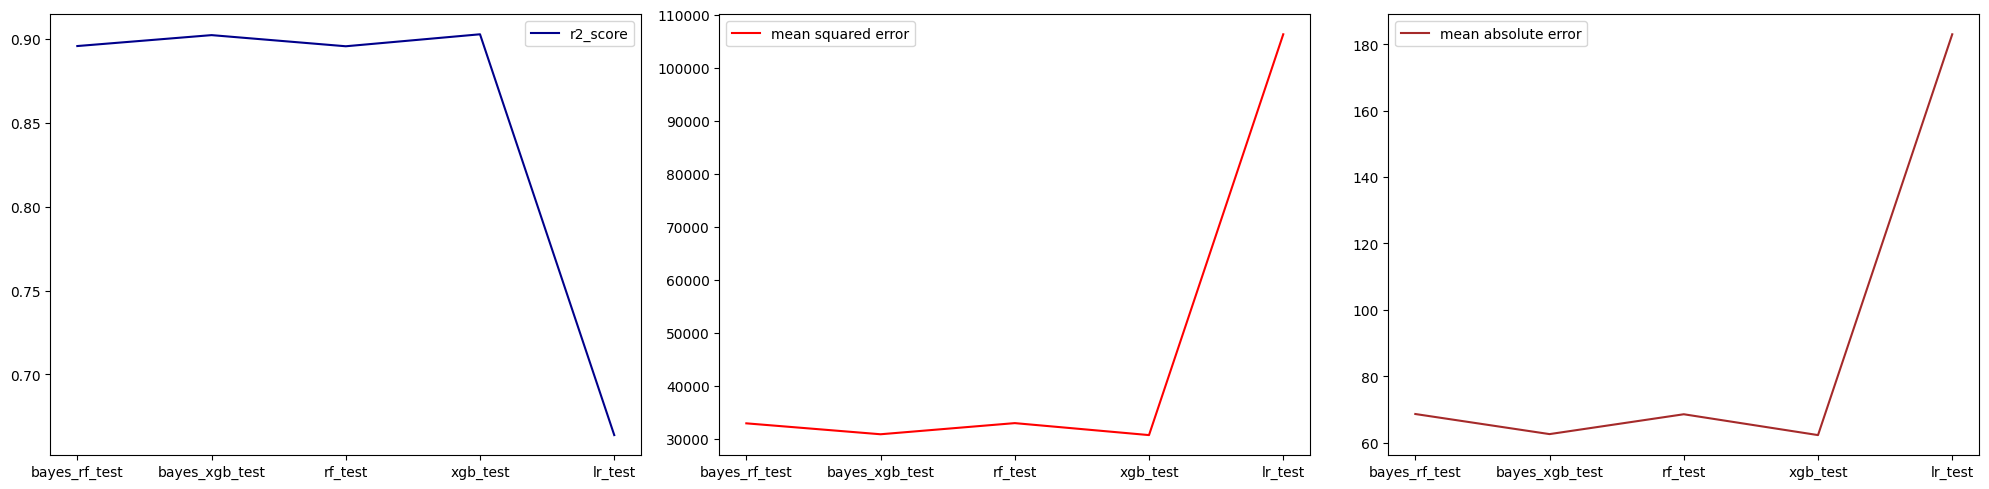

In [28]:
fig ,axes = plt.subplots(1 ,3,figsize=(20 ,5))

metrics = ["bayes_rf_test", "bayes_xgb_test", "rf_test", "xgb_test", "lr_test"]
r2_scores = [bayes_rf_test, bayes_xgb_test, rf_test, xgb_test, lr_test]  

mse_scores = [bayes_rf_mse_test, bayes_xgb_mse_test, rf_mse_test, xgb_mse_test, lr_mse_test] 
mae_scores = [bayes_rf_mae_test, bayes_xgb_mae_test, rf_mae_test, xgb_mae_test, lr_mae_test]  

sns.lineplot(x=metrics, y=r2_scores , label='r2_score', ax=axes[0], color='darkblue')
sns.lineplot(x=metrics, y=mse_scores, label='mean squared error' , ax=axes[1] , color='red')
sns.lineplot(x=metrics, y=mae_scores , label='mean absolute error' , ax=axes[2] , color='brown')

fig.tight_layout()



### Model Performance Summary

1. **`Bayesian Random Forest Regressor and Bayes xgb`**: Outperforms all models with the highest R² score and the lowest MSE and MAE.  
2. **`Random Forest Regressor (rf_test)`**: Ranks second with strong performance across all metrics.  
3. **`Linear Regression (lr_test)`**: Performs the worst, with the lowest R² and the highest errors.
